# Birds in Bexar County 2023

In [1]:
import pandas as pd
import numpy as np

import os

## acquire data

In [2]:
#read in the csv
df_init = pd.read_csv('data/ebd_US-TX-029_2023/ebd_US-TX-029_202301_202312_smp_relDec-2023.txt', sep='\t')

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254085 entries, 0 to 254084
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GLOBAL UNIQUE IDENTIFIER    254085 non-null  object 
 1   LAST EDITED DATE            254085 non-null  object 
 2   TAXONOMIC ORDER             254085 non-null  int64  
 3   CATEGORY                    254085 non-null  object 
 4   TAXON CONCEPT ID            254085 non-null  object 
 5   COMMON NAME                 254085 non-null  object 
 6   SCIENTIFIC NAME             254085 non-null  object 
 7   SUBSPECIES COMMON NAME      7781 non-null    object 
 8   SUBSPECIES SCIENTIFIC NAME  7781 non-null    object 
 9   EXOTIC CODE                 16108 non-null   object 
 10  OBSERVATION COUNT           254085 non-null  object 
 11  BREEDING CODE               3967 non-null    object 
 12  BREEDING CATEGORY           3967 non-null    object 
 13  BEHAVIOR CODE 

In [4]:
#make it python friendly
df_init.columns = df_init.columns.str.lower().str.replace('\W+','_',regex=True)

In [5]:
df_init.head()

,global_unique_identifier,last_edited_date,taxonomic_order,category,taxon_concept_id,common_name,scientific_name,subspecies_common_name,subspecies_scientific_name,exotic_code,...,number_observers,all_species_reported,group_identifier,has_media,approved,reviewed,reason,trip_comments,species_comments,unnamed_49
0,URN:CornellLabOfOrnithology:EBIRD:OBS1604293624,2023-01-11 23:54:00.580061,5751,species,avibase-8EB0C1FA,American Avocet,Recurvirostra americana,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,Seen and heard in flight over Bird Pond; indiv...,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS1595602863,2023-10-25 00:17:23.078205,7335,species,avibase-13E9F9B4,American Bittern,Botaurus lentiginosus,NaN,NaN,NaN,...,2.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS1607571036,2023-01-15 21:40:16.314384,21168,species,avibase-69544B59,American Crow,Corvus brachyrhynchos,NaN,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS1611944707,2023-01-21 17:57:44.50285,21168,species,avibase-69544B59,American Crow,Corvus brachyrhynchos,NaN,NaN,NaN,...,13.0,1,G9532004,0,1,0,NaN,This was a bird walk for the Bexar Audubon Soc...,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS1610976542,2023-01-20 15:08:11.491595,21168,species,avibase-69544B59,American Crow,Corvus brachyrhynchos,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN


In [6]:
df_init.shape

(254085, 50)

## prepare part 1

In [7]:
df_init.head()

,global_unique_identifier,last_edited_date,taxonomic_order,category,taxon_concept_id,common_name,scientific_name,subspecies_common_name,subspecies_scientific_name,exotic_code,...,number_observers,all_species_reported,group_identifier,has_media,approved,reviewed,reason,trip_comments,species_comments,unnamed_49
0,URN:CornellLabOfOrnithology:EBIRD:OBS1604293624,2023-01-11 23:54:00.580061,5751,species,avibase-8EB0C1FA,American Avocet,Recurvirostra americana,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,Seen and heard in flight over Bird Pond; indiv...,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS1595602863,2023-10-25 00:17:23.078205,7335,species,avibase-13E9F9B4,American Bittern,Botaurus lentiginosus,NaN,NaN,NaN,...,2.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS1607571036,2023-01-15 21:40:16.314384,21168,species,avibase-69544B59,American Crow,Corvus brachyrhynchos,NaN,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS1611944707,2023-01-21 17:57:44.50285,21168,species,avibase-69544B59,American Crow,Corvus brachyrhynchos,NaN,NaN,NaN,...,13.0,1,G9532004,0,1,0,NaN,This was a bird walk for the Bexar Audubon Soc...,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS1610976542,2023-01-20 15:08:11.491595,21168,species,avibase-69544B59,American Crow,Corvus brachyrhynchos,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN


#### drop rows with nothing in them

In [8]:
df_init = df_init.dropna(how='all',axis=1)

#### drop all the columns not useful for this analysis

In [9]:
df = df_init.drop(columns=['global_unique_identifier','last_edited_date','taxon_concept_id',
                                'scientific_name','subspecies_common_name','subspecies_scientific_name',
                                'exotic_code','breeding_code','breeding_category','behavior_code',
                                'age_sex','country','country_code','state_code','state','county',
                                'county_code','iba_code','bcr_code', 'locality_id', 'locality_type',
                                'protocol_code','protocol_type', 'project_code','effort_area_ha',
                                'has_media','approved','reviewed'])

# State of Bexar Bird/ers in 2023

In [10]:
df.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier,trip_comments,species_comments
0,5751,species,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,07:30:00,obsr3537385,S125972869,180.0,3.219,1.0,1,NaN,NaN,Seen and heard in flight over Bird Pond; indiv...
1,7335,species,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,08:50:00,obsr1483904,S125181190,74.0,1.724,2.0,1,NaN,NaN,NaN
2,21168,species,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,15:30:00,obsr2096377,S126262342,NaN,NaN,1.0,0,NaN,NaN,NaN
3,21168,species,American Crow,2,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-21,08:03:00,obsr3073010,S126645616,108.0,1.650,13.0,1,G9532004,This was a bird walk for the Bexar Audubon Soc...,NaN
4,21168,species,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,08:00:00,obsr59645,S126554160,180.0,32.187,1.0,1,NaN,NaN,NaN


### number of species seen

In [11]:
df.taxonomic_order.nunique()

492

> this value includes hybrids and unknowns

In [12]:
df [df.category == 'species'].taxonomic_order.nunique()

339

> there were 339 different species observered

### bird watching places

In [13]:
df.locality.nunique()

3347

> there were 3347 different places logged for birdwatching

the following sites are the top ten hotspots based on species seen:

        1	Mitchell Lake Audubon Center (HOTE 103)	353
        2	Braunig Lake (HOTE 101)	277
        3	Brackenridge Park (Avenue A & River Rd.)	269
        4	Crescent Bend Nature Park (Bexar Co.)	268
        5	Calaveras Lake (HOTE 100)	266
        6	San Antonio Botanical Garden (HOTE 096)	255
        7	Medina River Natural Area (HOTE 104)	242
        8	Live Oak City Park	240
        9	South Side Lions Park (HOTE 099)	229
        10	Bexar Co.--S. Evans Rd Lake	228
        
how does that compare to where birders actually went?

In [14]:
df[['sampling_event_identifier','locality']].drop_duplicates().locality.value_counts().head(15)

Mitchell Lake Audubon Center (HOTE 103)                           1394
Crescent Bend Nature Park (Bexar Co.)                              920
San Antonio Botanical Garden (HOTE 096)                            591
Home-Las Cimas: balcony                                            411
Brackenridge Park (Avenue A & River Rd.)                           346
Home                                                               304
209 Winged Teal                                                    302
Wiltshire Yard                                                     299
Government Canyon SNA (HOTE 085)                                   277
Honeydew Ridge, San Antonio US-TX 29.47995, -98.75086              240
Backyard                                                           194
Brackenridge Park (HOTE 095)                                       192
Braunig Lake (HOTE 101)                                            187
Woodlawn Lake (HOTE 093)                                           180
Leon C

In [15]:
df[['sampling_event_identifier','locality']].drop_duplicates().locality.str.contains('Braunig').sum()

197

> both Braunig Lake and Calaveras Lake appear to be an underutilized site for birdwatching

### popular birding days

In [16]:
df.observation_date.nunique()

365

>there was at least one list submitted every single day

In [17]:
df.groupby(['observation_date']).sampling_event_identifier.nunique().sort_values(ascending=False).head(5)

observation_date
2023-12-16    233
2023-02-19    203
2023-12-17    184
2023-02-18    170
2023-04-22    165
Name: sampling_event_identifier, dtype: int64

> december 16 and 17 were christmas count days! and the most popular bird days!

> were february 18 and 19 also counting days?

In [18]:
df.groupby(['observation_date']).sampling_event_identifier.nunique().sort_values(ascending=False).tail(5)

observation_date
2023-06-27    17
2023-08-03    16
2023-06-29    15
2023-08-02    15
2023-07-10    13
Name: sampling_event_identifier, dtype: int64

> on july 10, 2023, only 13 ebird lists were submitted

### time of day

In [19]:
df.time_observations_started.str[:2].value_counts().sort_index()

00       74
01        7
02       27
03       11
04       43
05      168
06     4795
07    42720
08    57601
09    35850
10    21339
11    17478
12    14457
13    13030
14    10839
15     8903
16     8865
17     8067
18     5078
19     3183
20      886
21      136
22       81
23       57
Name: time_observations_started, dtype: int64

> 8 am is the most popular start time

> why are people starting lists during nighttime hours?

### birders

In [20]:
df.observer_id.nunique()

2028

> there were 2028 birders in 2023

#### how many lists each birder submitted

In [21]:
obvs_ls = df.groupby(['observer_id']).sampling_event_identifier.nunique()
obvs_ls

observer_id
obsr1000095     4
obsr1000873     5
obsr100089     16
obsr1001058     1
obsr1002059    14
               ..
obsr996571      5
obsr997493      4
obsr998330      1
obsr999292      5
obsr999479      1
Name: sampling_event_identifier, Length: 2028, dtype: int64

In [22]:
obvs_ls [obvs_ls == 1 ].count()

799

In [23]:
799/2028

0.39398422090729784

> 39% of birders only submitted 1 list

In [24]:
round(obvs_ls.mean(),1)

9.6

> birders submitted an average of 9.6 checklists

<Axes: >

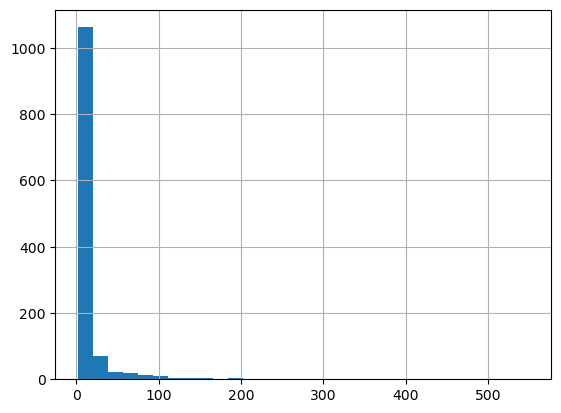

In [25]:
obvs_ls [obvs_ls > 1].hist(bins=30)

In [26]:
obvs_ls [obvs_ls > 100].nunique()

34

> only 34 birders submitted over 100 checklists

### checklists

In [27]:
df.sampling_event_identifier.nunique()

19427

> 19,427 ebird lists were submitted

In [28]:
df [df.all_species_reported == 1].sampling_event_identifier.nunique()

14806

In [29]:
14806/19427

0.7621351726977917

> 76% of those lists were complete lists

In [53]:
df.to_csv('condensed_bexar2023.csv')

# part 2 - Visualize things 

In [30]:
df.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,duration_minutes,effort_distance_km,number_observers,all_species_reported,group_identifier,trip_comments,species_comments
0,5751,species,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,07:30:00,obsr3537385,S125972869,180.0,3.219,1.0,1,NaN,NaN,Seen and heard in flight over Bird Pond; indiv...
1,7335,species,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,08:50:00,obsr1483904,S125181190,74.0,1.724,2.0,1,NaN,NaN,NaN
2,21168,species,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,15:30:00,obsr2096377,S126262342,NaN,NaN,1.0,0,NaN,NaN,NaN
3,21168,species,American Crow,2,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-21,08:03:00,obsr3073010,S126645616,108.0,1.650,13.0,1,G9532004,This was a bird walk for the Bexar Audubon Soc...,NaN
4,21168,species,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,08:00:00,obsr59645,S126554160,180.0,32.187,1.0,1,NaN,NaN,NaN


In [31]:
dfviz = df.drop(columns=['observer_id','duration_minutes','effort_distance_km',
                      'number_observers','sampling_event_identifier','time_observations_started',
                      'all_species_reported','trip_comments','species_comments'])

In [32]:
dfviz.head()

,taxonomic_order,category,common_name,observation_count,locality,latitude,longitude,observation_date,group_identifier
0,5751,species,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,NaN
1,7335,species,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,NaN
2,21168,species,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,NaN
3,21168,species,American Crow,2,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-21,G9532004
4,21168,species,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,NaN


#### only keep the known species category

In [33]:
dfviz.category.value_counts()

species     242768
issf          4210
domestic      3422
spuh          2017
slash         1399
form           242
hybrid          27
Name: category, dtype: int64

In [34]:
dfviz = dfviz [dfviz.category == 'species']

In [35]:
dfviz = dfviz.drop(columns='category')

In [36]:
dfviz.head()

,taxonomic_order,common_name,observation_count,locality,latitude,longitude,observation_date,group_identifier
0,5751,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,NaN
1,7335,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,NaN
2,21168,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,NaN
3,21168,American Crow,2,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-21,G9532004
4,21168,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,NaN


In [37]:
dfviz.shape

(242768, 8)

#### get rid of duplicate observations

when multiple people are birding together and they see the same bird, that bird gets counted twice. this is annotated as the the group_identifier. i do not want those duplicate counts in this analysis. the highest observation count will be kept for these duplications.

In [38]:
#find all dupe checklists
#sort them by observation count
#drop the duplicates, except teh first instance
df_keep_dups = dfviz [dfviz.group_identifier.notnull()].sort_values('observation_count', 
                                               ascending=False).drop_duplicates(subset=['taxonomic_order',
                                                                                        'group_identifier'])
df_keep_dups.tail()

,taxonomic_order,common_name,observation_count,locality,latitude,longitude,observation_date,group_identifier
80289,33300,Bronzed Cowbird,1,San Antonio Botanical Garden (HOTE 096),29.457417,-98.459301,2023-04-23,G10060644
80299,33300,Bronzed Cowbird,1,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-04-27,G10085726
80321,8293,Broad-winged Hawk,1,Devil's Bend Park,29.282749,-98.617229,2023-04-27,G10083518
80323,8293,Broad-winged Hawk,1,Crescent Bend Nature Park (Bexar Co.),29.550227,-98.232574,2023-04-21,G10042387
80328,8293,Broad-winged Hawk,1,Braunig Lake (HOTE 101),29.248820,-98.393971,2023-04-19,G10030657


In [39]:
df_keep_dups.shape

(28802, 8)

In [40]:
#remove all duplicate checklists completely
df_no_dups = dfviz [dfviz.group_identifier.isnull()]
df_no_dups.head()

,taxonomic_order,common_name,observation_count,locality,latitude,longitude,observation_date,group_identifier
0,5751,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,NaN
1,7335,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,NaN
2,21168,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,NaN
4,21168,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,NaN
5,21168,American Crow,1,Salado Creek Greenway--Jack White Park,29.452304,-98.423899,2023-01-18,NaN


In [41]:
df_no_dups.shape

(168877, 8)

In [42]:
#combine the no dups df with the first dups only df
dff = pd.concat([df_no_dups, df_keep_dups])

In [43]:
dff.head()

,taxonomic_order,common_name,observation_count,locality,latitude,longitude,observation_date,group_identifier
0,5751,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11,NaN
1,7335,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02,NaN
2,21168,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15,NaN
4,21168,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20,NaN
5,21168,American Crow,1,Salado Creek Greenway--Jack White Park,29.452304,-98.423899,2023-01-18,NaN


#### group identifier is no longer needed since dups have been removed

In [44]:
dff = dff.drop('group_identifier', axis=1)

In [45]:
dff.head()

,taxonomic_order,common_name,observation_count,locality,latitude,longitude,observation_date
0,5751,American Avocet,1,Mitchell Lake Audubon Center,29.304862,-98.497704,2023-01-11
1,7335,American Bittern,1,Medina River Greenway--Pleasanton Rd Trailhead,29.270249,-98.494046,2023-01-02
2,21168,American Crow,4,"Olmos Basin Park, San Antonio US-TX (29.4734,-...",29.473376,-98.476835,2023-01-15
4,21168,American Crow,3,Bexar Co.--Hardy/Mathis Rd. (E. of I-37),29.135219,-98.412738,2023-01-20
5,21168,American Crow,1,Salado Creek Greenway--Jack White Park,29.452304,-98.423899,2023-01-18


## visual the data

plotly?